In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [ ]:

import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


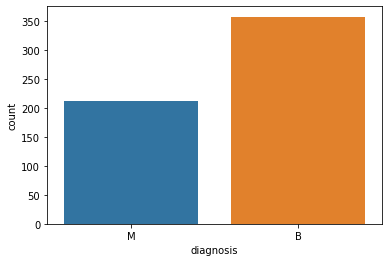

In [ ]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.52787029,  2.49821982, -0.59939466, ..., -1.74713139,
        -0.79044533, -0.91054389],
       [-0.55333608,  0.29431013, -0.60759343, ..., -0.62275667,
        -0.33646358, -0.83551633],
       [ 2.15452653,  0.40392257,  2.26525805, ...,  1.03846122,
        -0.11504791,  0.26488788],
       ...,
       [-1.3297598 , -0.21876938, -1.32088704, ..., -0.98271999,
        -0.718764  , -0.13637062],
       [-1.24940108, -0.24209117, -1.2835826 , ..., -1.74713139,
        -1.58690456, -1.01280367],
       [-0.74291476,  1.08958336, -0.71827692, ..., -0.2865488 ,
        -1.26354211,  0.19486216]])

In [ ]:
X_test

array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [ ]:
!pip install keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
# output_dim upgarted to  units: Positive integer, dimensionality of the output space.
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30 ))
#classifier.add(Dropout(p=1.0))

#adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dropout(p=1.0))

#adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [ ]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150  )

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.7187
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.7407
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.8154
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.8747
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.8967
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.9209
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.9341
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.9363
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.9429
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.9473
Epoch 11/150
5/5 [===========

In [ ]:
X_test


array([[-0.20813312,  0.29431013, -0.13944326, ...,  1.35620942,
         1.08282676,  1.50534354],
       [-0.26189423,  1.39743106, -0.3255555 , ..., -0.83852283,
        -0.73469319, -0.8855347 ],
       [-0.0327021 , -0.83912914, -0.10049907, ..., -0.50397936,
        -1.22531207, -0.92888396],
       ...,
       [-0.47410917,  0.14738282, -0.47600306, ..., -0.59340278,
        -0.35079984, -0.34311323],
       [-0.75423289, -0.7528385 , -0.77976775, ..., -0.75636222,
        -0.08637538,  0.21209071],
       [-0.79667588,  1.82421992, -0.83142005, ..., -1.43195543,
        -0.08956122, -0.71936255]])

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

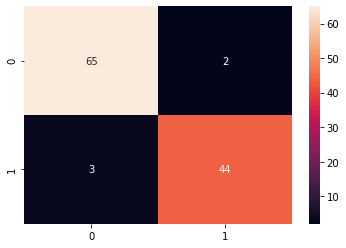

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [ ]:
#First Accuracy after training test_size=0.1
(65+48)/114

0.9912280701754386

In [ ]:
#Second Accuracy after training test_size=0.2
(65+44)/114

0.956140350877193

In [ ]:
# K-Fold Cross Validation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
  classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)



In [ ]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.97777778])

In [ ]:
accuracies.mean()

0.9823671519756317

In [ ]:
accuracies.std()

0.016463791332592098

In [ ]:
# Parameter Tunning

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
  classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)


Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 1ms/step - loss: 2.9706e-09 - accuracy: 1.0000
Epoch 381/500
13/13 [==============================] - 0s 1ms/step - loss: 2.9735e-09 - accuracy: 1.0000
Epoch 382/500
13/13 [==============================] - 0s 1ms/step - loss: 2.7793e-09 - accuracy: 1.0000
Epoch 383/500
13/13 [==============================] - 0s 1ms/step - loss: 2.9336e-09 - accuracy: 1.0000
Epoch 384/500
13/13 [==============================] - 0s 1ms/step - loss: 2.7982e-09 - accuracy: 1.0000
Epoch 385/500
13/13 [==============================] - 0s 1ms/step - loss: 2.7428e-09 - accuracy: 1.0000
Epoch 386/500
13/13 [==============================] - 0s 1ms/step - loss: 2.7499e-09 - accuracy: 1.0000
Epoch 387/500
13/13 [==============================] - 0s 1ms/step - loss: 2.8425e-09 - accuracy: 1.0000
Epoch 388/500
13/13 [==============================] - 0s 1ms/step - loss: 2.6539e-09 - accuracy: 1.0000
Epoch 389/500
13/1

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_